In [31]:
!export CUDA_VISIBLE_DEVICES=3
import torch
import numpy as np
import os
import torchvision.transforms.functional as tf

from utils.image_utils import psnr
image_id = 0
output = "output/dynerf_batch4_do/flame_salmon_1/"
render_path = os.path.join(output,"test","ours_10000",'renders')
gt_path = os.path.join(output,"test","ours_10000","gt")
images_render = os.listdir(render_path)
images_gt = os.listdir(gt_path)
images_render.sort()
images_gt.sort()
image_render_path = os.path.join(render_path,images_render[0])
image_gt_path = os.path.join(gt_path,images_gt[0])


In [38]:
from tqdm import tqdm
def readImages(renders_dir, gt_dir):
    renders = []
    gts = []
    image_names = []
    for fname in tqdm(os.listdir(renders_dir)):
#         print(renders_dir)
        render = Image.open(renders_dir +"/"+ fname)
        gt = Image.open(gt_dir +"/"+ fname)
        renders.append(tf.to_tensor(render).unsqueeze(0)[:, :3, :, :])
        gts.append(tf.to_tensor(gt).unsqueeze(0)[:, :3, :, :])
        image_names.append(fname)
    return renders, gts, image_names
# def vis_image(image):
    

In [40]:
renders, gts, image_names = readImages(render_path,gt_path)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:37<00:00,  8.01it/s]


In [42]:
renders[0].shape

torch.Size([1, 3, 1014, 1352])

In [43]:
psnr(renders[0],gts[0])

tensor([[29.2829]])

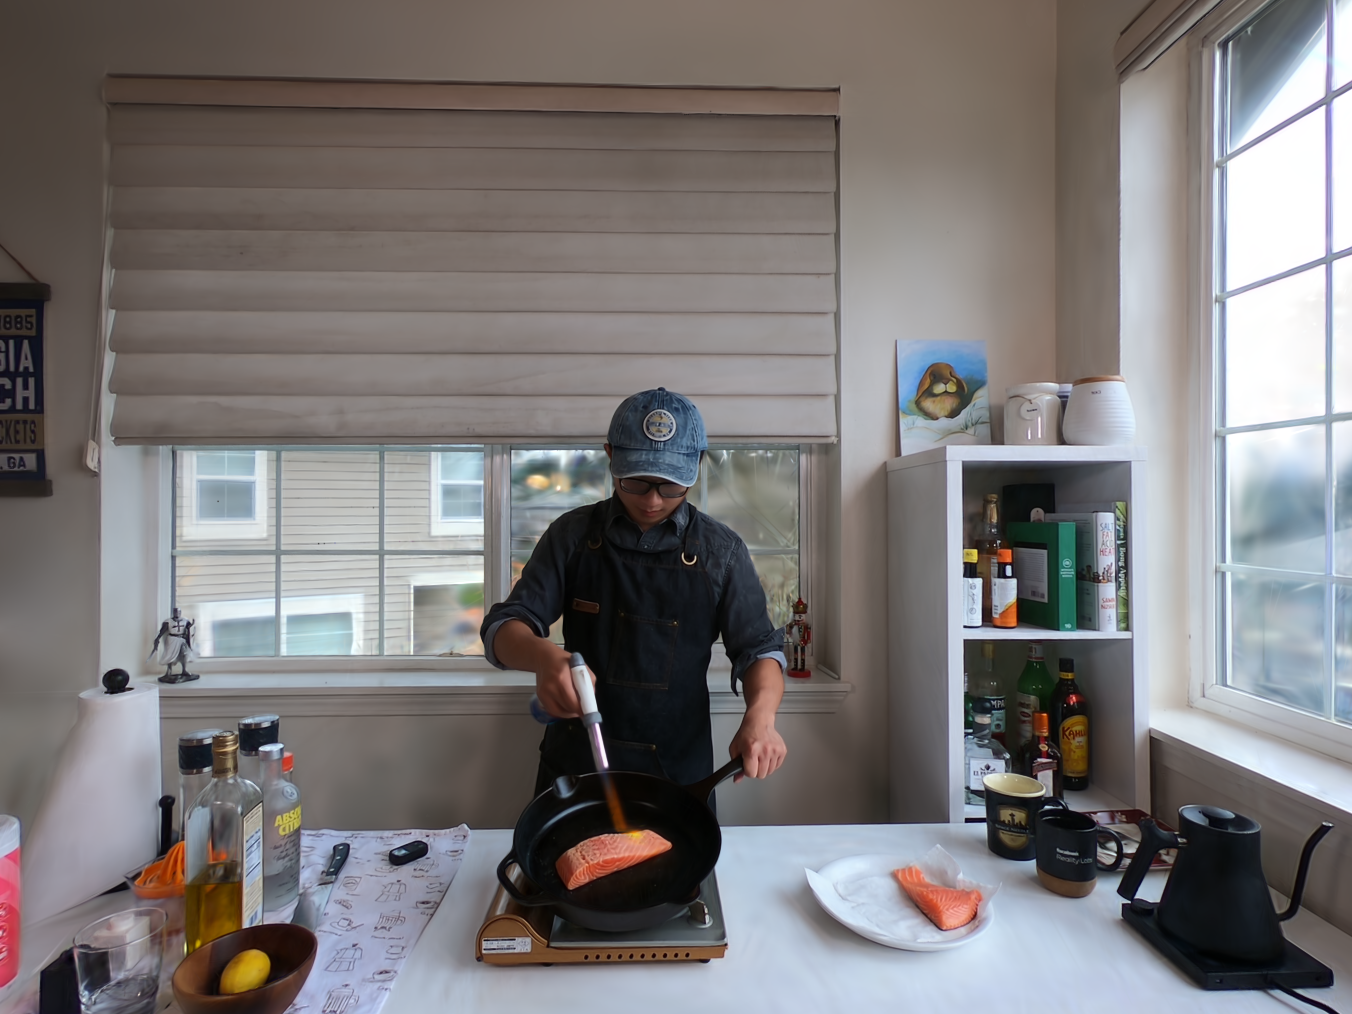

In [44]:
from torchvision import transforms
unloader = transforms.ToPILImage()
image = renders[0].cpu().clone()
image = image.squeeze()
unloader(image)